In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Concatenate, Reshape, Embedding, GlobalAveragePooling1D, Lambda

2025-05-05 17:48:12.665516: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


# ĐỌC LẠI FILE NUMPY GENBANK

In [2]:
X_train_num_GenBank_loaded = np.load('numpy_GenBank/X_train_num_GenBank.npy')
X_train_num_GenBank_loaded.shape

(1260000, 126)

In [3]:
X_val_num_GenBank_loaded = np.load('numpy_GenBank/X_val_num_GenBank.npy')
X_val_num_GenBank_loaded.shape

(270000, 126)

In [4]:
X_train_text_GenBank_loaded = np.load('numpy_GenBank/X_train_text_GenBank.npy')
X_train_text_GenBank_loaded.shape

(1260000, 50)

In [5]:
X_val_text_GenBank_loaded = np.load('numpy_GenBank/X_val_text_GenBank.npy')
X_val_text_GenBank_loaded.shape

(270000, 50)

In [6]:
# X_test_GenBank_loaded = pd.read_csv('numpy_GenBank/X_test_GenBank.csv')
# X_test_GenBank_loaded.shape

# Đọc dữ liệu theo từng khối nhỏ (100,000 dòng mỗi khối)
chunksize = 100000
X_test_GenBank_loaded = pd.read_csv('numpy_GenBank/X_test_GenBank.csv', chunksize=chunksize)

# Danh sách chứa các khối dữ liệu
chunks = []

# Duyệt qua từng khối dữ liệu và lưu vào danh sách
for chunk in X_test_GenBank_loaded:
    # Thêm khối dữ liệu vào danh sách
    chunks.append(chunk)

# Kết hợp tất cả các khối lại thành một DataFrame duy nhất
X_test_GenBank_loaded = pd.concat(chunks, axis=0)

# Kiểm tra kích thước cuối cùng của DataFrame
X_test_GenBank_loaded.shape

(270000, 127)

In [7]:
y_train_GenBank_loaded = np.load('numpy_GenBank/y_train_GenBank.npy')
y_train_GenBank_loaded.shape

(1260000,)

In [8]:
Y_val_GenBank_loaded = np.load('numpy_GenBank/Y_val_GenBank.npy')
Y_val_GenBank_loaded.shape

(270000,)

In [10]:
Y_test_GenBank_loaded = np.load('numpy_GenBank/Y_test_GenBank.npy')
Y_test_GenBank_loaded.shape

(270000,)

# ĐỌC NUMPY NOT GENBANK

In [11]:
X_train_num_notGenBank_loaded = np.load('numpy_notGenBank/X_train_num_notGenBank.npy')
X_train_num_notGenBank_loaded.shape

(1260000, 126)

In [12]:
X_val_num_notGenBank_loaded = np.load('numpy_notGenBank/X_val_num_notGenBank.npy')
X_val_num_notGenBank_loaded.shape

(270000, 126)

In [13]:
X_train_text_notGenBank_loaded = np.load('numpy_notGenBank/X_train_text_notGenBank.npy')
X_train_text_notGenBank_loaded.shape

(1260000, 50)

In [14]:
X_val_text_notGenBank_loaded = np.load('numpy_notGenBank/X_val_text_notGenBank.npy')
X_val_text_notGenBank_loaded.shape

(270000, 50)

In [15]:
# X_test_notGenBank_loaded = pd.read_csv('numpy_notGenBank/X_test_notGenBank.csv')
# X_test_notGenBank_loaded.shape

# Đọc dữ liệu theo từng khối nhỏ (100,000 dòng mỗi khối)
chunksize = 100000
X_test_notGenBank_loaded = pd.read_csv('numpy_notGenBank/X_test_notGenBank.csv', chunksize=chunksize)

# Danh sách chứa các khối dữ liệu
chunks = []

# Duyệt qua từng khối dữ liệu và lưu vào danh sách
for chunk in X_test_notGenBank_loaded:
    # Thêm khối dữ liệu vào danh sách
    chunks.append(chunk)

# Kết hợp tất cả các khối lại thành một DataFrame duy nhất
X_test_notGenBank_loaded = pd.concat(chunks, axis=0)

# Kiểm tra kích thước cuối cùng của DataFrame
X_test_notGenBank_loaded.shape

(270000, 127)

In [16]:
y_train_notGenBank_loaded = np.load('numpy_notGenBank/y_train_notGenBank.npy')
y_train_notGenBank_loaded.shape

(1260000,)

In [17]:
Y_val_notGenBank_loaded = np.load('numpy_notGenBank/Y_val_notGenBank.npy')
Y_val_notGenBank_loaded.shape

(270000,)

In [19]:
Y_test_notGenBank_loaded = np.load('numpy_notGenBank/Y_test_notGenBank.npy')
Y_test_notGenBank_loaded.shape

(270000,)

# CONCAT DỮ LIỆU

In [20]:
X_train_num = np.concatenate([X_train_num_GenBank_loaded, X_train_num_notGenBank_loaded], axis=0)

In [21]:
X_val_num = np.concatenate([X_val_num_GenBank_loaded, X_val_num_notGenBank_loaded], axis=0)

In [22]:
X_train_text = np.concatenate([X_train_text_GenBank_loaded, X_train_text_notGenBank_loaded], axis=0)

In [23]:
X_val_text = np.concatenate([X_val_text_GenBank_loaded, X_val_text_notGenBank_loaded], axis=0)

In [24]:
X_test = pd.concat([X_test_GenBank_loaded, X_test_notGenBank_loaded], axis=0, ignore_index=True)

In [25]:
y_train = np.concatenate([y_train_GenBank_loaded, y_train_notGenBank_loaded], axis=0)

In [26]:
Y_val = np.concatenate([Y_val_GenBank_loaded, Y_val_notGenBank_loaded], axis=0)

In [27]:
Y_test = np.concatenate([Y_test_GenBank_loaded, Y_test_notGenBank_loaded], axis=0)

# CHECK SAU CONCAT

In [28]:
X_train_num.shape

(2520000, 126)

In [29]:
X_val_num.shape

(540000, 126)

In [30]:
X_train_text.shape

(2520000, 50)

In [31]:
X_val_text.shape

(540000, 50)

In [32]:
X_test.shape

(540000, 127)

In [33]:
y_train.shape

(2520000,)

In [34]:
Y_val.shape

(540000,)

In [35]:
Y_test.shape

(540000,)

# MODEL

### Các class huấn luyện model
#### - Điều kiện quan trọng: embed_dim phải chia hết cho heads để mỗi đầu Attention có kích thước vector bằng nhau.
#### - Thông thường, số neurons trong FFN (neurons) nên gấp 2-4 lần embed_dim để mô hình có đủ khả năng trích xuất đặc trưng.
#### - Gợi ý công thức: neurons = 2 × embed_dim hoặc neurons = 4 × embed_dim.

In [36]:
# Định nghĩa Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, heads, neurons):
        super(TransformerEncoder, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=heads, key_dim=embed_dim // heads) # NOTE
        self.ffn = tf.keras.Sequential([
            layers.Dense(neurons, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(0.2)
        self.dropout2 = layers.Dropout(0.2)

    def call(self, inputs, training=None, mask=None):
        if mask is not None:
            # MHA yêu cầu mask shape: (batch_size, 1, 1, seq_len) hoặc (batch_size, seq_len)
            mask = tf.cast(mask[:, tf.newaxis, :], dtype=tf.int32)  # (batch_size, 1, seq_len)
    
        attn_output = self.att(inputs, inputs, attention_mask=mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Lớp embedding cho chuỗi văn bản
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        positions = tf.range(start=0, limit=self.maxlen, delta=1)
        positions = self.pos_emb(positions)
        x_embed = self.token_emb(x)
        return x_embed + positions, self.token_emb.compute_mask(x)


class MultiLayerTransformerEncoder(layers.Layer):
    def __init__(self, num_layers, embed_dim, heads, neurons):
        super(MultiLayerTransformerEncoder, self).__init__()
        self.encoders = [
            TransformerEncoder(embed_dim, heads, neurons)
            for _ in range(num_layers)
        ]

    def call(self, x, mask=None, training=False):
        for encoder_layer in self.encoders:
            x = encoder_layer(x, training=training, mask=mask)

        return x

In [37]:
# ==== THAM SỐ ====
# Đảm bảo TensorFlow đang chạy trong Eager Execution

embed_dim = 200   # Kích thước vector embedding
heads = 6        # Số đầu attention
neurons = 400     # Số nơ-ron của lớp fully connected
maxlen = 50      # Chiều dài chuỗi đầu vào (thay max_length bằng 100)
num_features = 126  # Số lượng cột số đầu vào
vocab_size = 26   # Kích thước từ vựng
num_layers = 6    # Số lớp transformer encoder

# ==== ĐỊNH NGHĨA INPUT ====
# Input cho dữ liệu số
num_input = Input(shape=(num_features,))
num_reshaped = Dense(embed_dim, activation="relu")(num_input)
num_reshaped = Reshape((1, embed_dim))(num_reshaped)  # Shape: (batch_size, 1, embed_dim)

# Input văn bản
text_input = Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
text_embedded, text_mask = embedding_layer(text_input)  # Shape: (batch_size, maxlen, embed_dim), (batch_size, maxlen)

# Ghép 2 đầu vào: (1 + maxlen, embed_dim)
merged_input = Concatenate(axis=1)([num_reshaped, text_embedded])

# Ghép mask: num_input không phải padding → mask = 1
def create_combined_mask(text_mask):
    # Tạo mask cho dữ liệu số (num_input) với giá trị là 1
    num_mask = tf.ones_like(text_mask[:, :1], dtype=tf.int32)  # num_mask sẽ có kiểu int32
    text_mask = tf.cast(text_mask, dtype=tf.int32)  # Chuyển text_mask sang kiểu int32
    return tf.concat([num_mask, text_mask], axis=1)


merged_mask = Lambda(
    create_combined_mask,
    output_shape=(maxlen + 1,)
)(text_mask)

# Nếu cần, reshape thêm cho phù hợp với attention mask yêu cầu
merged_mask = Lambda(lambda x: tf.cast(tf.expand_dims(x, axis=1), tf.float32))(merged_mask)

# Transformer encoder
multi_encoder = MultiLayerTransformerEncoder(num_layers=num_layers, embed_dim=embed_dim, heads=heads, neurons=neurons)
x = multi_encoder(merged_input, mask=merged_mask)

# Global Average Pooling để giảm chiều dữ liệu
x = GlobalAveragePooling1D()(x)

# Fully connected layers
x = Dense(neurons, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(embed_dim, activation="relu")(x)
x = Dropout(0.2)(x)

# Output (ví dụ: classification với softmax, có thể thay đổi)
output = Dense(1, activation="sigmoid")(x)

2025-05-05 17:50:34.589751: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2025-05-05 17:50:34.676605: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2025-05-05 17:50:34.857718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-05 17:50:34.863863: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:1e.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.58GiB deviceMemoryBandwidth: 298.08GiB/s
2025-05-05 17:50:34.864953: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2025-05-05 17:50:34.949938: I tensorflow/stream_executor/platform/default/dso_loade

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [38]:
# ==== TẠO MÔ HÌNH ====
model = Model(inputs=[num_input, text_input], outputs=output)

optimizer = Adam(learning_rate=0.000000005)  # Giảm tốc độ học thêm
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Hiển thị mô hình
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 126)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 200)          25400       input_1[0][0]                    
__________________________________________________________________________________________________
token_and_position_embedding (T ((None, 50, 200), (N 15200       input_2[0][0]                    
______________________________________________________________________________________________

In [39]:
model.load_weights('combinated_datasets_weights.best.weights.h5')

### Đang chạy sập máy - nên mất history accuracy loss

In [35]:
history = model.fit(
    [X_train_num, X_train_text], y_train,  # Đầu vào gồm dữ liệu số và dữ liệu chuỗi
    validation_data=([X_val_num, X_val_text], Y_val),  # Validation cũng có hai đầu vào
    epochs=400,
    batch_size=32,
    callbacks=callbacks_list  # Dùng danh sách callbacks đã khai báo ở cell 1
)

2025-05-04 08:27:56.702494: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-05-04 08:27:56.711413: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz


Epoch 1/400


2025-05-04 08:27:59.920035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


78750/78750 [==============================] - 1606s 20ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.0195 - val_accuracy: 0.9952

Epoch 00001: val_loss improved from inf to 0.01948, saving model to combinated_datasets_weights.best.weights.h5
Epoch 2/400
78750/78750 [==============================] - 1606s 20ms/step - loss: 0.0197 - accuracy: 0.9952 - val_loss: 0.0194 - val_accuracy: 0.9952

Epoch 00002: val_loss improved from 0.01948 to 0.01939, saving model to combinated_datasets_weights.best.weights.h5
Epoch 3/400
78750/78750 [==============================] - 1603s 20ms/step - loss: 0.0198 - accuracy: 0.9951 - val_loss: 0.0193 - val_accuracy: 0.9952

Epoch 00003: val_loss improved from 0.01939 to 0.01931, saving model to combinated_datasets_weights.best.weights.h5
Epoch 4/400
78750/78750 [==============================] - 1621s 21ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.0192 - val_accuracy: 0.9952

Epoch 00004: val_loss improved from 0.01931 to 0.01923, savi

KeyboardInterrupt: 

In [ ]:
history = model.fit(
    [X_train_num, X_train_text], y_train,  # Đầu vào gồm dữ liệu số và dữ liệu chuỗi
    validation_data=([X_val_num, X_val_text], Y_val),  # Validation cũng có hai đầu vào
    epochs=400,
    batch_size=32,
    callbacks=callbacks_list  # Dùng danh sách callbacks đã khai báo ở cell 1
)

2025-05-03 14:37:38.500837: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-05-03 14:37:38.501313: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2500000000 Hz


Epoch 1/400


2025-05-03 14:37:41.935234: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


78750/78750 [==============================] - 1622s 21ms/step - loss: 0.6943 - accuracy: 0.5364 - val_loss: 0.6180 - val_accuracy: 0.6897

Epoch 00001: val_loss improved from inf to 0.61802, saving model to combinated_datasets_weights.best.weights.h5
Epoch 2/400
78750/78750 [==============================] - 1619s 21ms/step - loss: 0.6338 - accuracy: 0.6644 - val_loss: 0.5463 - val_accuracy: 0.7335

Epoch 00002: val_loss improved from 0.61802 to 0.54633, saving model to combinated_datasets_weights.best.weights.h5
Epoch 3/400
78750/78750 [==============================] - 1620s 21ms/step - loss: 0.5699 - accuracy: 0.7580 - val_loss: 0.4612 - val_accuracy: 0.7811

Epoch 00003: val_loss improved from 0.54633 to 0.46122, saving model to combinated_datasets_weights.best.weights.h5
Epoch 4/400
78750/78750 [==============================] - 1623s 21ms/step - loss: 0.4885 - accuracy: 0.8306 - val_loss: 0.3572 - val_accuracy: 0.8516

Epoch 00004: val_loss improved from 0.46122 to 0.35717, savi

In [ ]:
def plot_history_accuracy(history):
    plt.plot(history.history["accuracy"], label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

plot_history_accuracy(history=history)

In [ ]:
def plot_history_loss(history):
    plt.plot(history.history["loss"], label="Training Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()

plot_history_loss(history=history)

### Ma trận nhầm lẫn

In [40]:
X_test_num = X_test.iloc[:, :126]  # Chọn 126 cột đầu tiên
X_test_text = X_test.iloc[:, -1]   # Chọn cột cuối cùng

# X_test_num = np.array(X_test_num, dtype=np.float32)
X_test_num = X_test_num.to_numpy(dtype=np.float32)

In [41]:
import ast  # abstract syntax tree

X_test_text = [ast.literal_eval(seq) if isinstance(seq, str) else seq for seq in X_test_text]

In [42]:
max_len = 50
X_test_text = np.array([
    seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len]
    for seq in X_test_text
], dtype=np.int32)

print("X_train_text shape:", X_test_text.shape)

X_train_text shape: (540000, 50)


In [43]:
predictions = model.predict([X_test_num, X_test_text],verbose = True)
predictions = (predictions >= 0.5).astype(int)

2025-05-05 17:51:39.459818: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2025-05-05 17:51:39.476366: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499995000 Hz
2025-05-05 17:51:40.052023: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


16875/16875 [==============================] - 99s 6ms/step


In [44]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test, predictions, target_names=['nAMP (Class 0)', 'AMP (Class 1)']))

                precision    recall  f1-score   support

nAMP (Class 0)       1.00      0.99      1.00    270000
 AMP (Class 1)       0.99      1.00      1.00    270000

      accuracy                           1.00    540000
     macro avg       1.00      1.00      1.00    540000
  weighted avg       1.00      1.00      1.00    540000



In [45]:
cm = confusion_matrix(Y_test, predictions)
cm = pd.DataFrame(cm, index=['nAMP', 'AMP'], columns=['nAMP', 'AMP'])

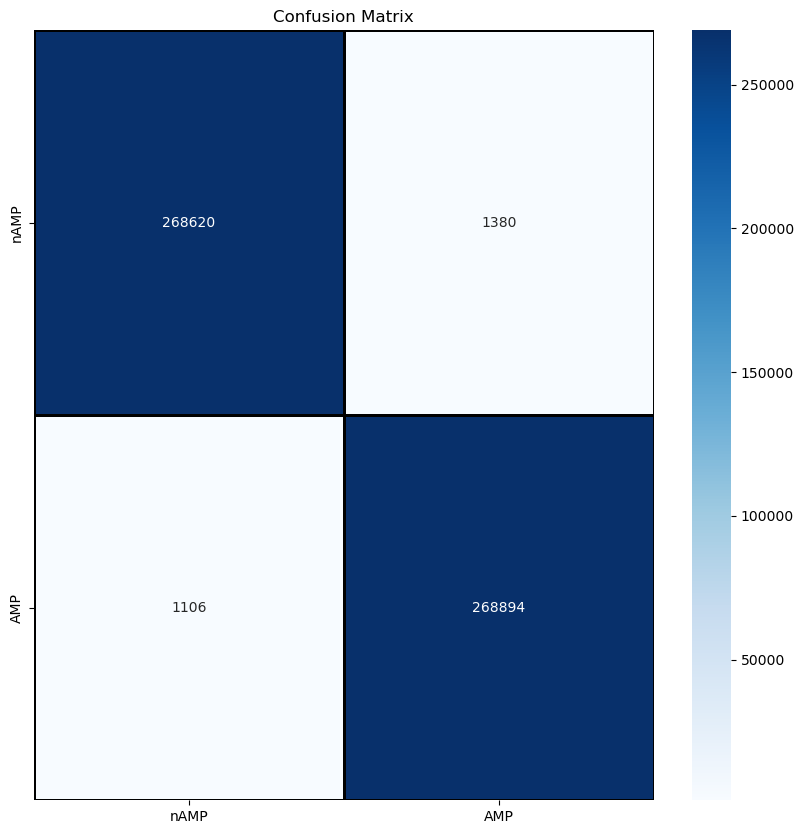

In [46]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='d', xticklabels=cm.columns, yticklabels=cm.index)
plt.title('Confusion Matrix')
plt.show()

# LIME

In [ ]:
X_test_num = X_test.iloc[:, :126]  # Chọn 126 cột đầu tiên
X_test_text = X_test.iloc[:, -1]   # Chọn cột cuối cùng

X_test_num = X_test_num.to_numpy(dtype=np.float32)

# Định nghĩa độ dài cố định cho X_train_text và X_val_text
max_len = 50  

# Chuyển đổi tất cả thành danh sách cùng kích thước
X_test_text = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_test_text], dtype=np.int32)

In [ ]:
num_features = X_train_num.shape[1]
text_features = X_train_text.shape[1]

def predict_proba_lime(X):
    X_num = X[:, 0:num_features]
    X_text = X[:, num_features:(num_features + text_features)] 
 
    # Dự đoán từ mô hình
    probs = model.predict([X_num, X_text])  
    
    # print(f"Trước khi flatten {probs.shape}")
    probs = probs.flatten()  # Chuyển thành mảng một chiều
    print(f"Sau khi flatten {probs.shape}")

    # Xác suất cho class 0 và class 1
    probs_class_0 = 1 - probs  
    probs_class_1 = probs   
    # print(f"probs_class_0 {probs_class_0.shape}")
    # print(f"probs_class_1 {probs_class_1.shape}")

    result = np.hstack([probs_class_0[:, np.newaxis], probs_class_1[:, np.newaxis]])
    # print(result)
    # print(f"result {result.shape}")
    
    # Trả về mảng 2 chiều với xác suất của cả hai lớp
    return result# class 0, class 1

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import lime

class_names = ['nAMP', 'AMP']

feature_names = data_amp.drop(columns=['ID', 'Label', 'Sequence']).columns.tolist()
text_feature_names = [f"text_feat_{i}" for i in range(X_train_text.shape[1])]
full_feature_names = feature_names + text_feature_names

X_train_combined = np.concatenate([X_train_num, X_train_text], axis=1)
    
explainer = LimeTabularExplainer(X_train_combined, feature_names =     
                                 full_feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [ ]:
sample_num = X_test_num[12]
sample_text = X_test_text[12]
sample = np.concatenate([sample_num, sample_text])

In [ ]:
exp = explainer.explain_instance(
    data_row=sample, 
    predict_fn=predict_proba_lime
)

exp.show_in_notebook(show_table=True)
# exp.save_to_file('lime_explanation1.html')

In [ ]:
import re

# Khởi tạo 4 mảng
amp_num = []
amp = []
namp_num = []
namp = []

# Hiển thị kết quả giải thích LIME
exp = explainer.explain_instance(
    data_row=sample, 
    predict_fn=predict_proba_lime
)

exp.show_in_notebook(show_table=True)

# Lấy danh sách các đặc trưng quan trọng
important_features = exp.as_list()

# Duyệt qua từng đặc trưng
for feature, weight in important_features:
    match = re.search(r'(num|text)_feat_(\d+)', feature)
    if match:
        kind = match.group(1)       # 'num' hoặc 'text'
        index = int(match.group(2)) # số đặc trưng

        if weight > 0:  # Class AMP (1)
            if kind == 'num':
                amp_num.append(index)
            else:
                amp.append(index)
        else:           # Class NAMP (0)
            if kind == 'num':
                namp_num.append(index)
            else:
                namp.append(index)

# In kết quả
print("AMP - num:", amp_num)
print("AMP - text:", amp)
print("NAMP - num:", namp_num)
print("NAMP - text:", namp)

In [ ]:
# Lấy độ dài tối đa của sample_text
last_50 = sample[-50:]

text_len = len(sample_text)

# Lấy các từ từ tokenizer
id2word = {v: k for k, v in tokenizer.word_index.items()}

# Lọc và lấy từ cho amp (chỉ số thuộc class 1), đồng thời sắp xếp theo thứ tự của sample_text
amp_text_words = [(i, id2word.get(sample_text[i], "<UNK>")) for i in amp if i < text_len and sample_text[i] != 0]
amp_text_words.sort(key=lambda x: x[0])  # Sắp xếp theo chỉ số

# Lọc và lấy từ cho namp (chỉ số thuộc class 0), đồng thời sắp xếp theo thứ tự của sample_text
namp_text_words = [(i, id2word.get(sample_text[i], "<UNK>")) for i in namp if i < text_len and sample_text[i] != 0]
namp_text_words.sort(key=lambda x: x[0])  # Sắp xếp theo chỉ số

# Lấy từ đã sắp xếp
amp_text_words_sorted = [word for _, word in amp_text_words]
namp_text_words_sorted = [word for _, word in namp_text_words]

# Tokenize lại các từ đã lấy ra
amp_text_tokens = tokenizer.texts_to_sequences([amp_text_words_sorted])[0]
namp_text_tokens = tokenizer.texts_to_sequences([namp_text_words_sorted])[0]

# In kết quả
print('Peptide text: ', " ".join([id2word.get(i, "<UNK>") for i in sample_text if i != 0]))
print("AMP (class 1) words:", amp_text_words_sorted)
print("AMP (class 1) tokens:", amp_text_tokens)
print("NAMP (class 0) words:", namp_text_words_sorted)
print("NAMP (class 0) tokens:", namp_text_tokens)

# SHAP

In [ ]:
import shap

In [ ]:
# Tách đặc trưng số và văn bản từ tập test
X_test_num = X_test.iloc[:, :126]  # 126 đặc trưng số
X_test_text = X_test.iloc[:, -1]   # 1 cột văn bản nhưng được padding lên 1558 chiều

# Chuyển đổi thành mảng numpy
# X_test_num = np.array(X_test_num, dtype=np.float32)
X_test_num = X_test_num.to_numpy(dtype=np.float32)

# Định nghĩa độ dài cố định cho dữ liệu text (1558 chiều)
max_len = 50  
X_test_text = np.array([seq[:max_len] + [0] * (max_len - len(seq)) if len(seq) < max_len else seq[:max_len] for seq in X_test_text], dtype=np.int32)

In [ ]:
# Tổng số đặc trưng: 126 số + 1558 text = 1684
num_features = X_test_num.shape[1]
text_features = X_test_text.shape[1]

# Kiểm tra số đặc trưng
print(f"Tổng số đặc trưng trong mẫu: {num_features + text_features}")  # Phải là 1684

# Xây dựng danh sách tên đặc trưng cho SHAP
feature_names = [f"num_feat_{i}" for i in range(num_features)]  # 126 cột số
text_feature_names = [f"text_feat_{i}" for i in range(text_features)] 
full_feature_names = feature_names + text_feature_names  # Tổng 1684 tên

# Chọn một mẫu duy nhất
sample_num = X_test_num[12:13]  # Lấy mẫu duy nhất tại chỉ số 10
sample_text = X_test_text[12:13]  # Lấy mẫu duy nhất tại chỉ số 10
samples = np.concatenate([sample_num, sample_text], axis=1)

# Xây dựng hàm dự đoán cho SHAP
def predict_shap_wrapper(X):
    """
    Chuyển đổi dữ liệu SHAP thành đầu vào phù hợp cho mô hình Transformer
    """
    X_num = X[:, 0:num_features]
    X_text = X[:, num_features:(num_features + text_features)]
    return model.predict([X_num, X_text])

# Dự đoán cho mẫu duy nhất
prediction = predict_shap_wrapper(samples)

In [ ]:
samples.shape

In [ ]:
# Chọn nền cho SHAP Explainer từ tập huấn luyện
X_train_combined = np.concatenate([X_train_num, X_train_text], axis=1)
background = shap.utils.sample(X_train_combined, 1)  # Lấy 1 mẫu ngẫu nhiên từ X_train_combined

# Tạo SHAP Explainer
try:
    explainer = shap.DeepExplainer(model, background)  # Nếu là mô hình deep learning
except:
    explainer = shap.KernelExplainer(predict_shap_wrapper, background)  # Backup nếu lỗi

# Đưa ra giải thích SHAP cho mẫu duy nhất
shap_values = explainer.shap_values(samples)  # Giải thích cho mẫu duy nhất đã chọn

In [ ]:
# Tính giá trị SHAP
shap_values = explainer.shap_values(samples)

# Xây dựng danh sách SHAP Explanation
shap_explanations = [
    shap.Explanation(
        values=shap_values[i],  
        base_values=explainer.expected_value,  
        data=samples[i],  
        feature_names=full_feature_names  
    )
    for i in range(len(samples))
]

In [ ]:
# Khởi tạo các mảng để lưu các đặc trưng phân loại theo lớp
num_amp = []
num_namp = []
text_amp = []
text_namp = []

# Giả sử bạn đã có kết quả dự đoán
prediction = predict_shap_wrapper(samples)  # Dự đoán cho mẫu (samples)
prediction_class = "amp" if prediction[0] == 1 else "namp"  # Đặt giá trị lớp (giả sử 1 là 'amp' và 0 là 'namp')

# Vẽ biểu đồ Waterfall Plot cho từng mẫu
for i, shap_exp in enumerate(shap_explanations):
    print(f"Waterfall Plot cho mẫu {i+1}:")
    
    # Chuyển ma trận (1684, 1) thành vector (1684,)
    shap_exp.values = shap_exp.values.reshape(-1)
    
    # Tạo danh sách các giá trị tuyệt đối của SHAP values
    abs_shap_values = np.abs(shap_exp.values)
    
    # Lấy các chỉ số của 9 đặc trưng quan trọng nhất (theo giá trị tuyệt đối của SHAP)
    top_9_indices = np.argsort(abs_shap_values)[-9:]
    
    # Liệt kê tên của 9 đặc trưng quan trọng nhất
    top_9_features = [shap_exp.feature_names[idx] for idx in top_9_indices]
    
    # In ra các tên đặc trưng quan trọng nhất
    print("9 đặc trưng quan trọng nhất:")
    for feat in top_9_features:
        print(feat)
        
        # Lấy số từ tên đặc trưng và phân loại theo lớp
        if "num_feat" in feat:
            num_id = int(feat.split("_")[2])  # Lấy số từ num_feat_X
            if prediction_class == "amp":
                num_amp.append(num_id)
            else:
                num_namp.append(num_id)
        elif "text_feat" in feat:
            text_id = int(feat.split("_")[2])  # Lấy số từ text_feat_X
            if prediction_class == "amp":
                text_amp.append(text_id)
            else:
                text_namp.append(text_id)
    
    # Vẽ biểu đồ Waterfall Plot
    shap.plots.waterfall(shap_exp)

# In ra kết quả phân loại các đặc trưng
print(f"num_amp: {num_amp}")
print(f"num_namp: {num_namp}")
print(f"text_amp: {text_amp}")
print(f"text_namp: {text_namp}")

# Map từ chỉ số về từ thực tế trong tokenizer
index2word = tokenizer.index_word

# Map từ chỉ số về từ thực tế trong tokenizer (bỏ qua 0 và từ không tồn tại)
amp_text_words = [index2word[idx] for idx in text_amp if idx != 0 and idx in index2word]
namp_text_words = [index2word[idx] for idx in text_namp if idx != 0 and idx in index2word]

# In kết quả
print("Từ quan trọng trong lớp AMP (class 1):", amp_text_words)
print("Từ quan trọng trong lớp NAMP (class 0):", namp_text_words)